In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Dataset/Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
x= df[['area', 'bedrooms','stories','parking']]
y=df['price']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:

def l_r(X, y, learning_rate, epochs):
    m, n = X.shape
    weights = np.zeros(n)
    cost_list = []

    for _ in range(epochs):
        pred = np.dot(X, weights)
        err = pred - y

        gradient = np.dot(X.T, err) / m
        weights -= learning_rate * gradient

        cost = (1 / (2 * m)) * np.sum(err**2)
        cost_list.append(cost)

    return weights, cost_list

learning_rate = 0.000000001
epochs = 100
weights, cost_list = l_r(x_train, y_train, learning_rate, epochs)

y_pred_test = np.dot(x_test, weights)
mse = np.mean((y_test - y_pred_test)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred_test))
total_variance = np.sum((y_test - np.mean(y_test))**2)
r2 = 1 - (mse / total_variance)

In [8]:
print(f"rmse value is {rmse}")
print(f"mse value is {mse}")
print(f" mae value is {mae}")
print(f" r2 score is {r2}")

rmse value is 2072565.7167343819
mse value is 4295528650182.7017
 mae value is 1616456.2373704913
 r2 score is 0.9922033886550833


In [9]:
res_df=pd.DataFrame({
    'Actual values':y_test,
    'predict_values':y_pred_test,
    'Difference (actual - predicted)':y_test-y_pred_test
})
res_df

,Actual values,predict_values,Difference (actual - predicted)
316,4060000,4.740599e+06,-6.805992e+05
77,6650000,5.222693e+06,1.427307e+06
360,3710000,3.246105e+06,4.638954e+05
90,6440000,4.017457e+06,2.422543e+06
493,2800000,3.181826e+06,-3.818258e+05
...,...,...,...
15,9100000,4.820948e+06,4.279052e+06
357,3773000,5.568195e+06,-1.795195e+06
39,7910000,4.820949e+06,3.089051e+06
54,7350000,4.820948e+06,2.529052e+06


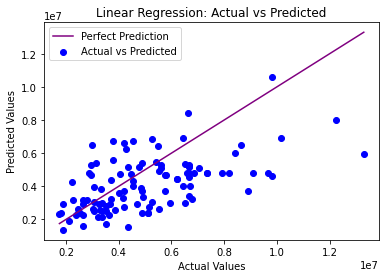

In [10]:

plt.scatter(res_df['Actual values'], res_df['predict_values'], color='blue', label='Actual vs Predicted')

plt.plot([min(res_df['Actual values']), max(res_df['Actual values'])],
         [min(res_df['Actual values']), max(res_df['Actual values'])], linestyle='-', color='purple', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()

plt.show()
